In [1]:
!pip install pycaret
from pycaret.classification import *
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM, Dropout, Conv1D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import time
from sklearn.model_selection import train_test_split

     |████████████████████████████████| 288 kB 5.1 MB/s 
     |████████████████████████████████| 6.8 MB 25.9 MB/s 
     |████████████████████████████████| 86 kB 8.4 MB/s 
     |████████████████████████████████| 113 kB 72.6 MB/s 
     |████████████████████████████████| 2.0 MB 50.3 MB/s 
     |████████████████████████████████| 261 kB 73.2 MB/s 
     |████████████████████████████████| 56 kB 6.6 MB/s 
     |████████████████████████████████| 1.7 MB 39.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.5 MB 21.5 MB/s 
     |████████████████████████████████| 1.3 MB 64.0 MB/s 
     |████████████████████████████████| 167 kB 75.7 MB/s 
     |████████████████████████████████| 303 kB 70.9 MB/s 
     |████████████████████████████████| 596 kB 90.0 MB/s 
     |████████████████████████████████| 102 kB 14.5 MB/s 
     |█████████████████

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')   # google drive를 google colab에 연결. 처음 실행 시, 인증 필요 
path = '/content/gdrive/My Drive/3-2/capston'
file = ["merge_Arousal.csv","merge_Valence.csv"]

Mounted at /content/gdrive


## Arousal Model

In [6]:


dir = '/content/gdrive/My Drive/3-2/Capston'
column_table = ["label", "mean", "std", "skewness", "kurotosis", "hjorth_mob", "hjorth_com",
                "hurst","dfa", "hfd","pfd", "MAX_PSD","MAX_freq","RMS"]
count = 0
test_acc = []
model = []
file = []
Best_test_acc = 0


filepath = dir + "/merge_Arousal.csv"
start = time.time()
fid = pd.read_csv(filepath, sep = ",")

fid = fid.drop("Unnamed: 0", axis=1) 
fid = fid.apply(pd.to_numeric)

zero = fid["label"].value_counts()[0]
one = fid["label"].value_counts()[1]
print(zero) 
print(one)


# type(df_values) = numpy.ndarray

y_data = fid['label']
x_data = fid.drop(['label'],axis=1)              

X_train, X_test, y_train, y_test = train_test_split(
x_data, y_data, test_size=0.2, shuffle=True, stratify=y_data)

print("preprocessing is running .,,, ")
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

print(y_train[y_train == 0].count())
print(y_train[y_train == 1].count())

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

print("preprocessing complete")

clf = setup(df_train, target='label', numeric_features=["mean", "std", "skewness", "kurotosis", "hjorth_mob", "hjorth_com",
"hurst","dfa", "hfd","pfd", "MAX_PSD","MAX_freq","RMS"])

#model compare
best3 = compare_models(sort='Accuracy', n_select=3)

#tuned_top3 = [tune_model(i) for i in best3]
tuned_top3 = [i for i in best3]
#tuned_top3_y = [tune_model(i) for i in best3]



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7618,0.8488,0.7485,0.7626,0.7541,0.5232,0.5250,0.521
rf,Random Forest Classifier,0.7523,0.8337,0.7476,0.7487,0.7470,0.5044,0.5058,0.704
lightgbm,Light Gradient Boosting Machine,0.7380,0.8166,0.7221,0.7378,0.7285,0.4753,0.4770,0.118
gbc,Gradient Boosting Classifier,0.6730,0.7501,0.6663,0.6653,0.6650,0.3457,0.3465,0.476
dt,Decision Tree Classifier,0.6525,0.6521,0.6379,0.6480,0.6413,0.3044,0.3057,0.029
knn,K Neighbors Classifier,0.6377,0.6810,0.5901,0.6414,0.6134,0.2737,0.2754,0.128
ada,Ada Boost Classifier,0.6192,0.6658,0.6037,0.6122,0.6072,0.2376,0.2382,0.177
qda,Quadratic Discriminant Analysis,0.5780,0.6325,0.8454,0.5438,0.6616,0.1667,0.1976,0.013
nb,Naive Bayes,0.5657,0.6146,0.8416,0.5350,0.6539,0.1425,0.1723,0.013
ridge,Ridge Classifier,0.5632,0.0000,0.6888,0.5410,0.6054,0.1315,0.1374,0.013


In [7]:

blender = blend_models(estimator_list = tuned_top3,fold = 10) 
#blender_y = blend_models(estimator_list = tuned_top3_y,fold = 10) 

#plot_model(estimator=blender, plot = 'feature')
final = finalize_model(blender)
#final_y = finalize_model(blender_y)

#print(plot_model(estimator = final))
print(final)   



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7524,0.8376,0.7184,0.7629,0.7400,0.5040,0.5049
1,0.7905,0.8578,0.8447,0.7565,0.7982,0.5817,0.5855
2,0.7333,0.8472,0.7157,0.7300,0.7228,0.4659,0.4660
3,0.7762,0.8650,0.7549,0.7778,0.7662,0.5516,0.5519
4,0.7048,0.7860,0.6863,0.7000,0.6931,0.4087,0.4088
5,0.7799,0.8835,0.7157,0.8111,0.7604,0.5583,0.5621
6,0.6746,0.7800,0.7647,0.6393,0.6964,0.3519,0.3585
7,0.7512,0.8464,0.7451,0.7451,0.7451,0.5021,0.5021
8,0.7943,0.8624,0.7941,0.7864,0.7902,0.5884,0.5884
9,0.8182,0.8872,0.7843,0.8333,0.8081,0.6357,0.6367


VotingClassifier(estimators=[('et',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                 

In [8]:
predict1 = predict_model(best3[0], df_test)
predict2 = predict_model(best3[1], df_test)
predict3 = predict_model(best3[2], df_test)
predict7 = predict_model(blender, df_test)
predict8 = predict_model(final, df_test)


pre_list = [predict1,predict2,predict3,predict7,predict8]

model_list = [best3[0], best3[1], best3[2], blender, final]
from pycaret.utils import check_metric
i=0
# testset evaluation
for pre in pre_list:
  model_test_acc = check_metric(pre['label'], pre['Label'], metric = 'Accuracy')
  print("TestSet Accuracy ----for",model_list[i],"\n", model_test_acc)
  test_acc.append(model_test_acc)
  model.append(model_list[i])
  i+=1


TestSet Accuracy ----for ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=300, verbose=0,
                     warm_start=False) 
 0.7687
TestSet Accuracy ----for RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estim

In [11]:
test_acc

[0.7687, 0.7522, 0.7687, 0.7806, 0.8134]

In [12]:
save_model(model[4], '1222_Arousal_0.8134')

#model = load_model("Arousal_0.78")
#print(model)


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['mean', 'std',
                                                           'skewness',
                                                           'kurotosis',
                                                           'hjorth_mob',
                                                           'hjorth_com', 'hurst',
                                                           'dfa', 'hfd', 'pfd',
                                                           'MAX_PSD', 'MAX_freq',
                                                           'RMS'],
                                       target='label', time_features=[])),
        

In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import numpy as np

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics
from sklearn.metrics import classification_report

#model_test_acc = check_metric(predicr8['label'], predict8['Label'], metric = 'Accuracy')
cnf = confusion_matrix(predict8['label'], predict8['Label'])
print(classification_report(predict8['label'], predict8['Label']))
print(cnf)

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       295
           1       0.84      0.82      0.83       375

    accuracy                           0.81       670
   macro avg       0.81      0.81      0.81       670
weighted avg       0.81      0.81      0.81       670

[[236  59]
 [ 66 309]]


[[236  59]
 [ 66 309]]


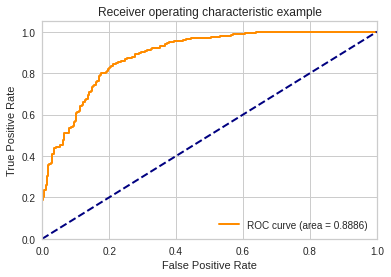

In [19]:
#model_test_acc = check_metric(predicr8['label'], predict8['Label'], metric = 'Accuracy')
cnf = confusion_matrix(predict8['label'], predict8['Label'])
print(cnf)

#df_test = df_test.drop(['RMS'],axis=1)
#df_test = df_test.drop(['label'],axis=1)
df_test = df_test.drop(['RMS'],axis=1)
df_test = df_test.drop(['label'],axis=1)

y_pred = final.predict_proba(df_test)
y_pred = y_pred[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(predict8['label'], y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Valence Model

In [152]:
##Valence

dir = '/content/gdrive/My Drive/3-2/Capston'
column_table = ["label", "mean", "std", "skewness", "kurotosis", "hjorth_mob", "hjorth_com",
                "hurst","dfa", "hfd","pfd", "MAX_PSD","MAX_freq","RMS"]
count = 0
test_acc = []
model = []
file = []
Best_test_acc = 0


filepath = dir + "/merge_Valence.csv"
start = time.time()
fid = pd.read_csv(filepath, sep = ",")

fid = fid.drop("Unnamed: 0", axis=1) 
fid = fid.apply(pd.to_numeric)

zero = fid["label"].value_counts()[0]
one = fid["label"].value_counts()[1]
print(zero) 
print(one)


# type(df_values) = numpy.ndarray

y_data = fid['label']
x_data = fid.drop(['label'],axis=1)              

X_train, X_test, y_train, y_test = train_test_split(
x_data, y_data, test_size=0.2, shuffle=True, stratify=y_data)

print("preprocessing is running .,,, ")
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

print(y_train[y_train == 0].count())
print(y_train[y_train == 1].count())

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

print("preprocessing complete")

clf = setup(df_train, target='label', numeric_features=["mean", "std", "skewness", "kurotosis", "hjorth_mob", "hjorth_com",
"hurst","dfa", "hfd","pfd", "MAX_PSD","MAX_freq","RMS"])

#model compare
best3 = compare_models(sort='Accuracy', n_select=3)

#tuned_top3 = [tune_model(i) for i in best3]
tuned_top3 = [i for i in best3]
#tuned_top3_y = [tune_model(i) for i in best3]



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8538,0.9319,0.8394,0.8653,0.8521,0.7076,0.7081,0.553
rf,Random Forest Classifier,0.8319,0.9112,0.8150,0.8446,0.8294,0.6639,0.6645,0.768
lightgbm,Light Gradient Boosting Machine,0.7893,0.8787,0.7683,0.8036,0.7853,0.5787,0.5796,0.132
dt,Decision Tree Classifier,0.7268,0.7269,0.7102,0.7363,0.7227,0.4537,0.4543,0.033
gbc,Gradient Boosting Classifier,0.7206,0.8071,0.7041,0.7295,0.7163,0.4413,0.4419,0.597
ada,Ada Boost Classifier,0.6781,0.7299,0.6957,0.6739,0.6844,0.3560,0.3565,0.204
knn,K Neighbors Classifier,0.6712,0.7332,0.5887,0.7079,0.6424,0.3427,0.3481,0.120
qda,Quadratic Discriminant Analysis,0.6243,0.6778,0.6828,0.6133,0.6439,0.2483,0.2530,0.015
nb,Naive Bayes,0.5902,0.6585,0.8509,0.5614,0.6757,0.1787,0.2103,0.014
lda,Linear Discriminant Analysis,0.5618,0.6023,0.6445,0.5550,0.5959,0.1229,0.1248,0.017


In [153]:

blender = blend_models(estimator_list = tuned_top3,fold = 10) 
#blender_y = blend_models(estimator_list = tuned_top3_y,fold = 10) 

#plot_model(estimator=blender, plot = 'feature')
final = finalize_model(blender)
#final_y = finalize_model(blender_y)

#print(plot_model(estimator = final))
print(final)   



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8506,0.9346,0.8397,0.8594,0.8494,0.7012,0.7014
1,0.8352,0.9044,0.8092,0.8548,0.8314,0.6706,0.6715
2,0.8238,0.9210,0.7786,0.8571,0.8160,0.6476,0.6504
3,0.8238,0.9221,0.7939,0.8455,0.8189,0.6476,0.6488
4,0.8084,0.9116,0.7863,0.8240,0.8047,0.6169,0.6176
5,0.8276,0.9127,0.7939,0.8525,0.8221,0.6553,0.6568
6,0.8115,0.8950,0.8077,0.8140,0.8108,0.6231,0.6231
7,0.8423,0.9149,0.8308,0.8504,0.8405,0.6846,0.6848
8,0.8615,0.9434,0.8550,0.8682,0.8615,0.7231,0.7232
9,0.8231,0.9193,0.8321,0.8195,0.8258,0.6461,0.6462


VotingClassifier(estimators=[('et',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                 

In [154]:
predict1 = predict_model(best3[0], df_test)
predict2 = predict_model(best3[1], df_test)
predict3 = predict_model(best3[2], df_test)
predict7 = predict_model(blender, df_test)
predict8 = predict_model(final, df_test)

model_new = []
pre_list = [predict1,predict2,predict3,predict7,predict8]

model_list = [best3[0], best3[1], best3[2], blender, final]
from pycaret.utils import check_metric
i=0
# testset evaluation
for pre in pre_list:
  model_test_acc = check_metric(pre['label'], pre['Label'], metric = 'Accuracy')
  print("TestSet Accuracy ----for",model_list[i],"\n", model_test_acc)
  test_acc.append(model_test_acc)
  model_new.append(model_list[i])
  i+=1


TestSet Accuracy ----for ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=6307, verbose=0,
                     warm_start=False) 
 0.8
TestSet Accuracy ----for RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimat

In [155]:
print(test_acc)
#print(final)
#print(final.get_params()["estimators"])
#print("################")
# print(len(model))

# print(model_new[4])

[0.8, 0.7507, 0.7418, 0.7776, 0.803]


In [166]:
save_model(model_new[4], '1222_Valence_0.803')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['mean', 'std',
                                                           'skewness',
                                                           'kurotosis',
                                                           'hjorth_mob',
                                                           'hjorth_com', 'hurst',
                                                           'dfa', 'hfd', 'pfd',
                                                           'MAX_PSD', 'MAX_freq',
                                                           'RMS'],
                                       target='label', time_features=[])),
        

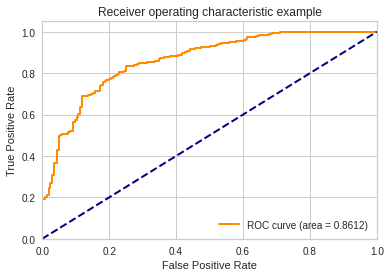

In [164]:

df_test = df_test.drop(['RMS'],axis=1)
df_test = df_test.drop(['label'],axis=1)

y_pred = final.predict_proba(df_test)
y_pred = y_pred[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(predict8['label'], y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [165]:

#model_test_acc = check_metric(predicr8['label'], predict8['Label'], metric = 'Accuracy')
cnf = confusion_matrix(predict8['label'], predict8['Label'])
print(classification_report(predict8['label'], predict8['Label']))
print(cnf)

              precision    recall  f1-score   support

           0       0.66      0.72      0.69       204
           1       0.87      0.84      0.86       466

    accuracy                           0.80       670
   macro avg       0.77      0.78      0.77       670
weighted avg       0.81      0.80      0.81       670

[[147  57]
 [ 75 391]]


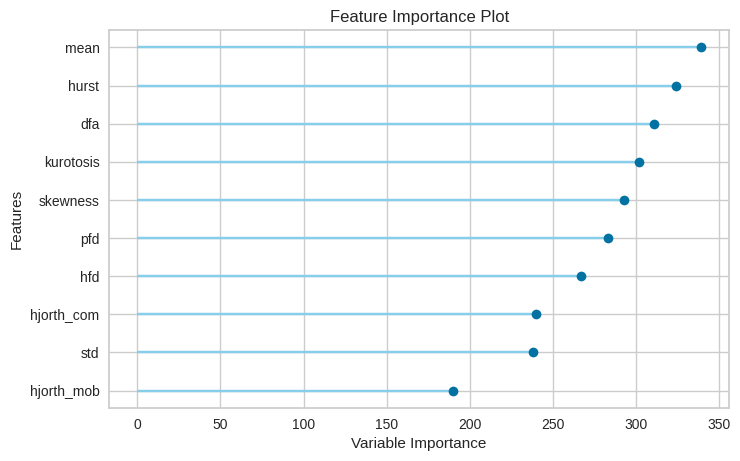

In [ ]:
#rf, et, lgbm

#plot_model(estimator=best3[0], plot = 'feature')
#plot_model(estimator=best3[1], plot = 'feature')
plot_model(estimator=best3[2], plot = 'feature')


In [ ]:


def compute_feature_importance(voting_clf):
    """ Function to compute feature importance of Voting Classifier """
    k=0
    importance = [0]*12
    feature_importance = dict()
    for est in voting_clf.estimators_:
        feature_importance[str(est)] = est.feature_importances_
    print(feature_importance.values())

    for idx, imp_score in enumerate(feature_importance.values()):
      #if k==2:
      #  pass
      for i in range(12):
        importance[i] += imp_score[i]
    
    print(importance)
    return importance

In [ ]:
column_table = ["mean", "std", "skewness", "kurotosis", "hjorth_mob", "hjorth_com",
                "hurst","dfa", "hfd","pfd", "MAX_PSD","MAX_freq"]
df = pd.DataFrame()
df['Feature'] = column_table
df['Feature Importance'] = compute_feature_importance(final)#each model importances
df.sort_values('Feature Importance', ascending=False)

dict_values([array([0.07703485, 0.07671111, 0.09442334, 0.09689251, 0.08362076,
       0.096028  , 0.08350835, 0.10002722, 0.09579323, 0.09060781,
       0.07826134, 0.02709148]), array([0.07118323, 0.07221594, 0.10927102, 0.09465887, 0.08418184,
       0.09652569, 0.08298658, 0.10113491, 0.09987263, 0.08869195,
       0.08068847, 0.01858887]), array([243, 182, 308, 320, 158, 308, 281, 366, 267, 268, 238,  61],
      dtype=int32)])
[243.14821807628934, 182.14892705596952, 308.20369436136565, 320.19155137742865, 158.1678025989639, 308.19255369145714, 281.1664949371731, 366.2011621265499, 267.1956658563999, 268.17929976063664, 238.15894980798046, 61.04568034978574]


,Feature,Feature Importance
7,dfa,366.201162
3,kurotosis,320.191551
2,skewness,308.203694
5,hjorth_com,308.192554
6,hurst,281.166495
9,pfd,268.179300
8,hfd,267.195666
0,mean,243.148218
10,MAX_PSD,238.158950
1,std,182.148927


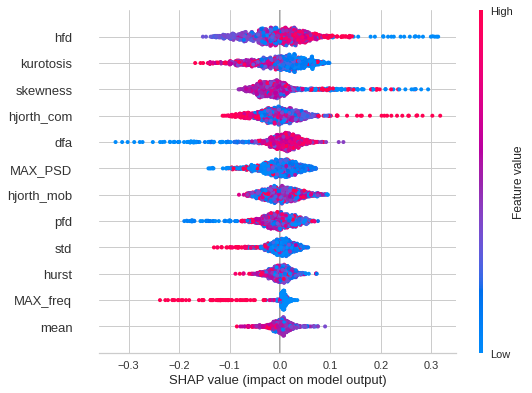

In [ ]:
#!pip install shap
import shap
interpret_model(best3[1])


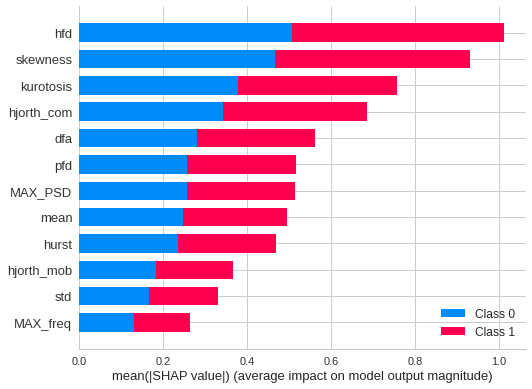

In [ ]:
shap.initjs()
explainer = shap.TreeExplainer(best3[2])
df_t = df_train.drop(['label'],axis=1)
df_t = df_t.drop(['RMS'],axis=1)

shap_values = explainer.shap_values(df_t)

shap.summary_plot(shap_values, df_t)

In [ ]:
interpret_model(best3[2], plot = 'reason', observation = 10)
 

In [ ]:
explainer = shap.TreeExplainer(best3[2]) # Tree model Shap Value 확인 객체 지정
shap_values = np.array(explainer.shap_values(df_test)) # Shap Values 계산

shap.initjs() # javascript 초기화 (graph 초기화)

shap.force_plot(explainer.expected_value[0], shap_values[1])
#shap.force_plot(explainer.expected_value[1], shap_values)

#shap.force_plot(explainer.expected_value, shap_values)

2
###########
2
